In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics classification_report, confusion_matrix
import tensorflow as tf

import numpy as np
import pandas as pd

In [71]:
df = pd.read_csv(r'C:\Users\User\Desktop\test.csv')
dt = pd.read_csv(r'C:\Users\User\Desktop\train.csv')

In [72]:
dt.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [73]:
dt.shape

(7613, 5)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi'] = 80

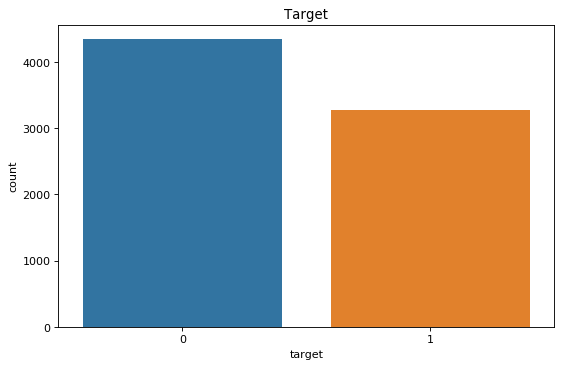

In [75]:
## Target Class Distribution

sns.countplot('target', data=dt)
plt.title('Target')
plt.show()

In [76]:
#Preprocessing Train Data
import re
import string

#Remove URLS

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in dt.text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
t
@bbcmtd Wholesale Markets ablaze 


In [78]:
dt["text"] = dt.text.map(remove_URL) # map(lambda x: remove_URL(x))
dt["text"] = dt.text.map(remove_punct)

In [79]:
# Handling the stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
dt["text"] = dt.text.map(remove_stopwords)

In [81]:
dt.text

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                      m194 0104 utc5km volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [82]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)

In [83]:
num_unique_words = len(counter)

In [91]:
#Train Test Split
X = dt.text.to_numpy()
y = dt.target.to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 10)

In [96]:
X_train.shape, X_test.shape

((5329,), (2284,))

In [97]:
#Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(X_train) # fit only to training WHY?

In [98]:
# each word has unique index
word_index = tokenizer.word_index

In [99]:
word_index

{'like': 1,
 'im': 2,
 'amp': 3,
 'fire': 4,
 'new': 5,
 'get': 6,
 'news': 7,
 'one': 8,
 'via': 9,
 'dont': 10,
 'people': 11,
 'us': 12,
 'video': 13,
 '2': 14,
 'emergency': 15,
 'disaster': 16,
 'police': 17,
 'would': 18,
 'still': 19,
 'back': 20,
 'burning': 21,
 'buildings': 22,
 'california': 23,
 'suicide': 24,
 'got': 25,
 'body': 26,
 'storm': 27,
 'time': 28,
 'bomb': 29,
 'first': 30,
 'day': 31,
 'fires': 32,
 'crash': 33,
 'know': 34,
 'rt': 35,
 'going': 36,
 'man': 37,
 'see': 38,
 'dead': 39,
 'train': 40,
 'go': 41,
 'nuclear': 42,
 'two': 43,
 'love': 44,
 'world': 45,
 'say': 46,
 'many': 47,
 'today': 48,
 'last': 49,
 'good': 50,
 '3': 51,
 'may': 52,
 'attack': 53,
 'cant': 54,
 'youtube': 55,
 'car': 56,
 'full': 57,
 'families': 58,
 'need': 59,
 'killed': 60,
 'want': 61,
 'help': 62,
 'u': 63,
 'could': 64,
 'accident': 65,
 'make': 66,
 'war': 67,
 'best': 68,
 'think': 69,
 'look': 70,
 'way': 71,
 'hiroshima': 72,
 'home': 73,
 'years': 74,
 'work': 75,

In [100]:
# Convert text to number sequence
train_seq = tokenizer.texts_to_sequences(X_train)
val_seq = tokenizer.texts_to_sequences(X_test)

In [104]:
print(X_train[0])
print(train_seq[0])

pennlive two families displaced mechanicsburg blaze one injured fire
[5225, 43, 58, 284, 5226, 524, 8, 117, 4]


In [105]:
# We want the same legnth for every sequence

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 20

train_padded = pad_sequences(train_seq, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_seq, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape


((5329, 20), (2284, 20))

In [106]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [108]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [109]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[17, 527, 162, 260, 39, 1112, 915]
police officer wounded suspect dead exchanging shots


In [120]:
# Create Simple RNN model
from tensorflow.keras import layers
from tensorflow import keras


model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))
model.add(layers.SimpleRNN(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            558304    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                6208      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 564,577
Trainable params: 564,577
Non-trainable params: 0
_________________________________________________________________


In [121]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)


In [122]:
model.fit(train_padded, y_train, epochs=20, validation_data=(val_padded, y_test), verbose=2)

Epoch 1/20
167/167 - 2s - loss: 0.5633 - accuracy: 0.7110 - val_loss: 0.4846 - val_accuracy: 0.7837
Epoch 2/20
167/167 - 1s - loss: 0.2736 - accuracy: 0.8990 - val_loss: 0.5395 - val_accuracy: 0.7754
Epoch 3/20
167/167 - 1s - loss: 0.1241 - accuracy: 0.9615 - val_loss: 0.6138 - val_accuracy: 0.7688
Epoch 4/20
167/167 - 1s - loss: 0.0742 - accuracy: 0.9762 - val_loss: 0.6793 - val_accuracy: 0.7745
Epoch 5/20
167/167 - 1s - loss: 0.0538 - accuracy: 0.9797 - val_loss: 0.7175 - val_accuracy: 0.7334
Epoch 6/20
167/167 - 1s - loss: 0.0488 - accuracy: 0.9786 - val_loss: 0.8024 - val_accuracy: 0.7592
Epoch 7/20
167/167 - 1s - loss: 0.0423 - accuracy: 0.9809 - val_loss: 0.7520 - val_accuracy: 0.7360
Epoch 8/20
167/167 - 1s - loss: 0.0368 - accuracy: 0.9837 - val_loss: 0.8336 - val_accuracy: 0.7605
Epoch 9/20
167/167 - 1s - loss: 0.0326 - accuracy: 0.9846 - val_loss: 0.8633 - val_accuracy: 0.7447
Epoch 10/20
167/167 - 1s - loss: 0.0343 - accuracy: 0.9831 - val_loss: 0.9150 - val_accuracy: 0.7653

In [111]:
# Create LSTM model

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))
model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            558304    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 583,201
Trainable params: 583,201
Non-trainable params: 0
_________________________________________________________________


In [113]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [115]:
model.fit(train_padded, y_train, epochs=20, validation_data=(val_padded, y_test), verbose=2)

Epoch 1/20
167/167 - 5s - loss: 0.5626 - accuracy: 0.7029 - val_loss: 0.4642 - val_accuracy: 0.7912
Epoch 2/20
167/167 - 2s - loss: 0.2936 - accuracy: 0.8893 - val_loss: 0.4826 - val_accuracy: 0.7837
Epoch 3/20
167/167 - 2s - loss: 0.1506 - accuracy: 0.9508 - val_loss: 0.5053 - val_accuracy: 0.7859
Epoch 4/20
167/167 - 2s - loss: 0.1002 - accuracy: 0.9688 - val_loss: 0.6770 - val_accuracy: 0.7855
Epoch 5/20
167/167 - 2s - loss: 0.0780 - accuracy: 0.9760 - val_loss: 0.8841 - val_accuracy: 0.7780
Epoch 6/20
167/167 - 2s - loss: 0.0603 - accuracy: 0.9818 - val_loss: 0.8391 - val_accuracy: 0.7662
Epoch 7/20
167/167 - 2s - loss: 0.0602 - accuracy: 0.9807 - val_loss: 0.8073 - val_accuracy: 0.7833
Epoch 8/20
167/167 - 2s - loss: 0.0406 - accuracy: 0.9839 - val_loss: 0.9734 - val_accuracy: 0.7798
Epoch 9/20
167/167 - 2s - loss: 0.0425 - accuracy: 0.9835 - val_loss: 1.0662 - val_accuracy: 0.7544
Epoch 10/20
167/167 - 2s - loss: 0.0364 - accuracy: 0.9859 - val_loss: 0.9797 - val_accuracy: 0.7736

In [123]:
# Create GRU model

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))
model.add(layers.GRU(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 32)            558304    
_________________________________________________________________
gru (GRU)                    (None, 64)                18816     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 577,185
Trainable params: 577,185
Non-trainable params: 0
_________________________________________________________________


In [124]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [125]:
model.fit(train_padded, y_train, epochs=20, validation_data=(val_padded, y_test), verbose=2)

Epoch 1/20
167/167 - 3s - loss: 0.6653 - accuracy: 0.5958 - val_loss: 0.5210 - val_accuracy: 0.7474
Epoch 2/20
167/167 - 2s - loss: 0.3781 - accuracy: 0.8439 - val_loss: 0.4612 - val_accuracy: 0.8047
Epoch 3/20
167/167 - 2s - loss: 0.1978 - accuracy: 0.9276 - val_loss: 0.5023 - val_accuracy: 0.7557
Epoch 4/20
167/167 - 2s - loss: 0.1135 - accuracy: 0.9640 - val_loss: 0.7463 - val_accuracy: 0.7627
Epoch 5/20
167/167 - 2s - loss: 0.0794 - accuracy: 0.9762 - val_loss: 0.7343 - val_accuracy: 0.7859
Epoch 6/20
167/167 - 2s - loss: 0.0650 - accuracy: 0.9807 - val_loss: 0.8249 - val_accuracy: 0.7688
Epoch 7/20
167/167 - 2s - loss: 0.0582 - accuracy: 0.9812 - val_loss: 0.6351 - val_accuracy: 0.7763
Epoch 8/20
167/167 - 2s - loss: 0.0542 - accuracy: 0.9825 - val_loss: 0.8279 - val_accuracy: 0.7785
Epoch 9/20
167/167 - 2s - loss: 0.0495 - accuracy: 0.9812 - val_loss: 1.0079 - val_accuracy: 0.7767
Epoch 10/20
167/167 - 2s - loss: 0.0397 - accuracy: 0.9839 - val_loss: 1.2099 - val_accuracy: 0.7531